In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
%pwd

'e:\\AI DA Portfolio\\Potato-Disease\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'e:\\AI DA Portfolio\\Potato-Disease'

In [5]:
class ImageDataValidator:
    def __init__(self, image_dir, labels, batch_size=100):
        self.image_dir = image_dir
        self.labels = labels  # List of class labels (e.g., ['healthy', 'early_blight', 'late_blight'])
        self.batch_size = batch_size
        self.findings = []  # Store validation findings

    def check_corrupted_images(self):
        corrupted_images = []
        for label in self.labels:
            label_dir = os.path.join(self.image_dir, label)
            image_files = os.listdir(label_dir)
            
            # Process images in batches
            for i in range(0, len(image_files), self.batch_size):
                batch = image_files[i:i + self.batch_size]  # Get a batch of images
                for image_file in batch:
                    image_path = os.path.join(label_dir, image_file)
                    try:
                        img = Image.open(image_path)
                        img.verify()  # Verify if the image is corrupted
                    except (IOError, SyntaxError) as e:
                        corrupted_images.append(image_path)
        
        if corrupted_images:
            self.findings.append(f"Corrupted Images: {len(corrupted_images)} found.")
            print("Corrupted Images:\n", corrupted_images)
        else:
            self.findings.append("No corrupted images found.")
            print("No corrupted images found.")

    def check_image_dimensions(self, target_size=(224, 224)):
        for label in self.labels:
            label_dir = os.path.join(self.image_dir, label)
            image_files = os.listdir(label_dir)
            
            # Process images in batches
            for i in range(0, len(image_files), self.batch_size):
                batch = image_files[i:i + self.batch_size]  # Get a batch of images
                for image_file in batch:
                    image_path = os.path.join(label_dir, image_file)
                    img = Image.open(image_path)
                    if img.size != target_size:
                        self.findings.append(f"Image {image_file} in class {label} has dimensions {img.size}, expected {target_size}.")
                        print(f"Image {image_file} in class {label} has dimensions {img.size}, expected {target_size}.")

    def visualize_sample_images(self):
        for label in self.labels:
            label_dir = os.path.join(self.image_dir, label)
            sample_images = os.listdir(label_dir)[:5]  # Take the first 5 images as a sample
            plt.figure(figsize=(10, 2))
            for i, image_file in enumerate(sample_images):
                image_path = os.path.join(label_dir, image_file)
                img = Image.open(image_path)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.title(label)
                plt.axis('off')
            plt.show()

    def save_findings(self, output_file):
        with open(output_file, 'w') as f:
            for finding in self.findings:
                f.write(finding + '\n')

    def validate(self):
        print("Performing image data validation checks...\n")
        self.check_corrupted_images()
        self.check_image_dimensions()
        self.visualize_sample_images()
        self.save_findings('artifacts/findings.txt')  # Save findings to the artifacts folder

Performing image data validation checks...

No corrupted images found.
Image 14484ea5-9c34-427c-abe4-2743265aced0___RS_HL 4204.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 20ac28d6-5708-4e31-8676-1b1979de094f___RS_HL 1735.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 23f4d3b1-23f4-43fb-96c2-dae37224ec74___RS_HL 1803.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 369479a9-3c28-4d77-8731-9ae54e719af3___RS_HL 1785.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 415ac4a2-8f16-4052-880e-1e1f208965f0___RS_HL 1884.JPG in class healthy has dimensions (256, 256), expected (224, 224).
Image 45bc0b37-ca59-4a89-8531-705af42a6fd5___RS_HL 194

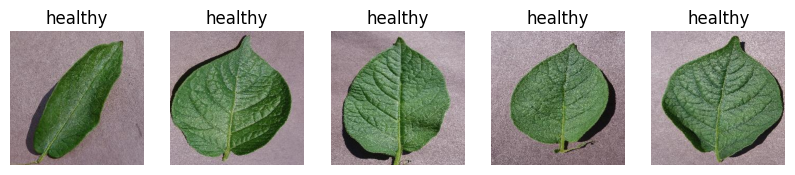

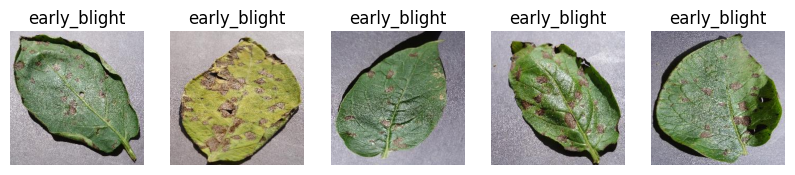

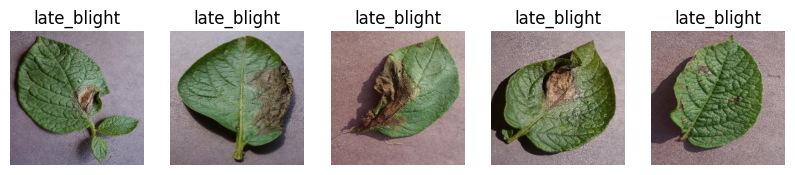

In [6]:
image_dir = 'artifacts/data_ingestion/val'  # Updated path for validation images
labels = ['healthy', 'early_blight', 'late_blight']
validator = ImageDataValidator(image_dir=image_dir, labels=labels)
validator.validate()